In [7]:
import pandas as pd
import numpy as np

week1 = pd.read_csv('nfl-big-data-bowl-2021/week1.csv')
week1.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [22]:
# Count number of games in a week
def num_games(week):
    return week['gameId'].nunique()

# Count number of plays in a week
def num_plays(week):
    return week['playId'].nunique()

In [23]:
num_games(week1) # 13
num_plays(week1) # 928

928

In [166]:
week1.head()


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,None
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,None
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,None
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [26]:
plays = pd.read_csv('nfl-big-data-bowl-2021/plays.csv')
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [34]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [83]:
plays.playType.value_counts()

play_type_pass       17346
play_type_sack        1260
play_type_unknown      633
Name: playType, dtype: int64

In [86]:
# drop unknown play types
plays = plays[plays['playType']!='play_type_unknown']

In [33]:
game_ids = plays.gameId.unique().tolist()

### ATL WEEK 1

In [116]:
atl_plays = plays[plays.possessionTeam == 'ATL']
atl_plays_week1 = plays[(plays.possessionTeam == 'ATL') & (plays.gameId == 2018090600)]

In [118]:
#C: Complete pass
#I: Incomplete pass
#S: Quarterback sack
#IN: Intercepted pass

atl_plays.passResult.value_counts()

C     424
I     181
S      42
IN      7
Name: passResult, dtype: int64

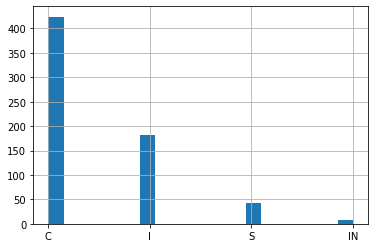

In [119]:
atl_plays['passResult'].hist(bins=20) # histogram of passResult

In [112]:
#Multiple Regression
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [120]:
atl_plays.iloc[0]

gameId                                                           2018090600
playId                                                                   75
playDescription           (15:00) M.Ryan pass short right to J.Jones pus...
quarter                                                                   1
down                                                                      1
yardsToGo                                                                15
possessionTeam                                                          ATL
playType                                                     play_type_pass
yardlineSide                                                            ATL
yardlineNumber                                                           20
offenseFormation                                                     I_FORM
personnelO                                                 2 RB, 1 TE, 2 WR
defendersInTheBox                                                         7
numberOfPass

In [121]:
# make binary variables for pass result
y = pd.get_dummies(atl_plays.passResult, prefix='pass_')
#print(y.head())
atl_plays = atl_plays.join(y, how='outer')
#atl_week1 = atl_week1.drop(columns=['passResult'])

In [145]:
formula = 'pass__C ~ 0 + quarter + down + yardsToGo + C(offenseFormation) + defendersInTheBox ' + \
            ' + numberOfPassRushers + absoluteYardlineNumber'

In [151]:
Y, X = dmatrices(formula, atl_plays, return_type='dataframe')
y = Y['pass__C'].values

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [153]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [154]:
#Accuracy on train
from sklearn import metrics
prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.6600877192982456


In [158]:
# y_train is 0 or 1.
print('Number of positive examples =', len(y_train[y_train==1]))
print('Number of negative examples =', len(y_train[y_train==0]))

Number of positive examples = 302
Number of negative examples = 154


In [155]:
#Accuracy on test
prediction = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction))

0.6377551020408163


In [157]:
negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)

print('Number of examples where baseline is correct =', negative_examples_in_test)
print('Number of examples where baseline is incorrect =', total_examples_in_test-negative_examples_in_test)
print('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

Number of examples where baseline is correct = 74
Number of examples where baseline is incorrect = 122
Baseline accuracy = 0.37755102040816324


In [165]:
# Feature weights
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

C(offenseFormation)[PISTOL]       -0.580116
numberOfPassRushers               -0.326378
C(offenseFormation)[I_FORM]       -0.252070
down                              -0.032023
absoluteYardlineNumber             0.003427
yardsToGo                          0.016269
defendersInTheBox                  0.061270
quarter                            0.260220
C(offenseFormation)[SINGLEBACK]    0.286248
C(offenseFormation)[EMPTY]         0.422997
C(offenseFormation)[SHOTGUN]       0.496362
dtype: float64

### Scratch Work

In [76]:
# One-hot encoding

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = atl_week1['passResult']
values = array(data)
print(values)

# integer encode
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)


# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded

# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

['C' 'I' 'I' 'C' 'I' 'I' 'C' 'C' 'I' 'I' 'I' 'C' 'C' 'C' 'I' 'S' 'C' 'I'
 'C' 'I' 'C' 'I' 'I' 'C' 'C' 'I' 'I' 'I' 'I' 'C' 'IN' 'C' 'C' 'S' 'C' 'C'
 'C' 'I' 'S' 'C' 'C' 'S' 'C' 'I' 'I' 'I' 'I' 'I']


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
